# CODE TO PREDICT STOCK MARKET PRICE

# TASK #1: LIBRARIES KEY LIBRARIES AND DATASETS 

In [46]:
# This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.
# import key libraries and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [47]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [48]:
stock.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [49]:
stock.tail(10)

,Interest Rates,Employment,S&P 500 Price
990,2.018200,56.929616,2206.946180
991,1.936748,52.967524,2086.159182
992,2.591529,57.281030,2686.211789
993,1.740441,55.098645,1922.893274
994,1.868835,60.543377,2065.424594
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [50]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [51]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# TASK #2: PERFORM DATA VISUALIZATION

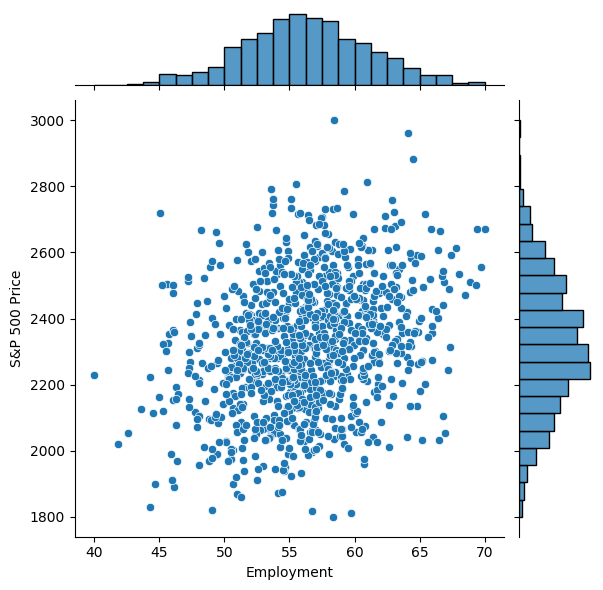

In [52]:
sns.jointplot(x= 'Employment', y= 'S&P 500 Price', data=stock)
plt.show()

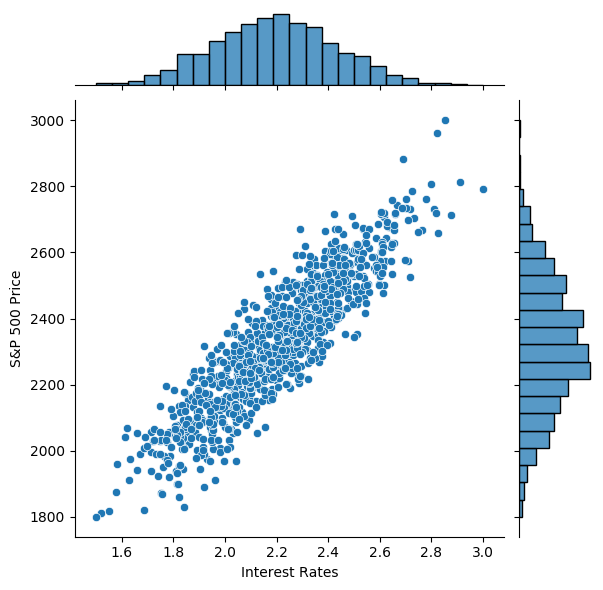

In [53]:
sns.jointplot(x= 'Interest Rates', y= 'S&P 500 Price', data=stock)
plt.show()

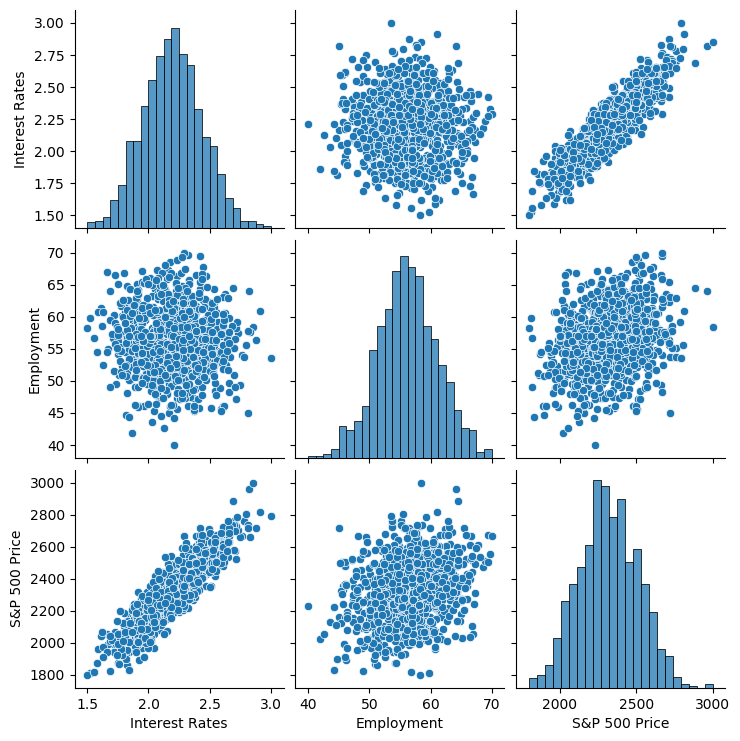

In [54]:
sns.pairplot(stock)
plt.show()

# TASK #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [55]:
y = stock['S&P 500 Price']

In [56]:
X = stock[['Interest Rates', 'Employment']]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TASK #4: TRAIN AND EVALUATE THE MACHINE LEARNING MODEL

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regressor = LinearRegression(fit_intercept=True)

In [61]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [722.88333818  12.08293806]
Linear Model Coefficient (b):  54.66292007692027


In [63]:
y_predict = regressor.predict(X_test)
y_predict

array([2556.07654974, 2402.94830502, 2503.53397594, 2330.76741551,
       2396.86751843, 2596.93996704, 2516.51587157, 2151.61534309,
       2069.99391551, 2546.39762826, 2313.84355568, 2367.86439257,
       2319.0339653 , 2411.01682208, 2472.34583525, 2513.03216065,
       2372.45320188, 2182.45496235, 2220.19270698, 2468.88639777,
       2555.58911914, 2261.90602802, 2159.93273548, 2591.17740625,
       2472.99850382, 2298.56950017, 2224.97600389, 2447.94098625,
       2277.57759464, 2815.31065271, 2514.75701733, 1992.47688689,
       2278.26293965, 2575.85941617, 2373.97703692, 2227.26609395,
       2476.66653375, 2339.91570061, 2489.43447222, 2501.91221068,
       2416.07587037, 2180.84061079, 2447.31008488, 2165.43013809,
       2273.83779448, 2059.46213764, 2097.21310234, 2524.52491423,
       2516.01700502, 2378.16192072, 2089.75991706, 2173.51647521,
       2130.727212  , 2260.6387622 , 2520.23651478, 2253.9492538 ,
       2232.69381333, 2498.30309846, 2559.88696018, 2172.79097

In [64]:
y_test

727    2668.522152
187    2312.234510
141    2478.615520
105    2380.175799
672    2341.632103
          ...     
121    2412.288762
142    2268.189407
970    2355.225478
446    2246.138405
327    2418.457054
Name: S&P 500 Price, Length: 200, dtype: float64

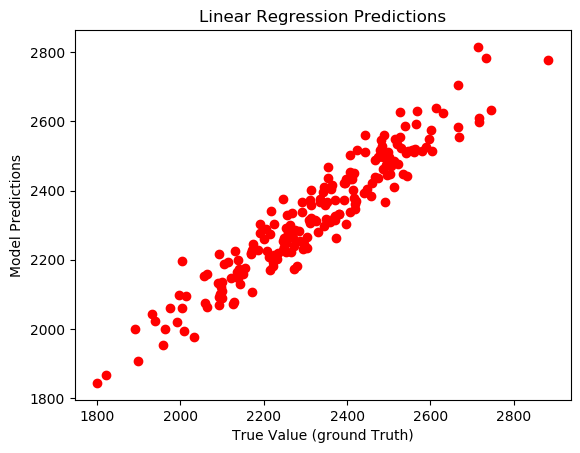

In [65]:
plt.scatter(y_test, y_predict, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [66]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) / y_test )) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 59.153 
MSE = 3499.1122615688055 
MAE = 48.481367359746876 
R2 = 0.9076859125902528 
Adjusted R2 = 0.906748713733301 
Mean Absolute Percentage Error = 2.0972603006386255 %


# TASK #5: VISUALIZE THE RESULTS in 3D

In [67]:
from mpl_toolkits.mplot3d import Axes3D

x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))
x_surf.shape

(100, 100)

In [68]:
y_surf.shape

(100, 100)

In [69]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})
onlyX.shape

(10000, 2)

In [70]:
fittedY = regressor.predict(onlyX)
fittedY.shape

(10000,)

In [71]:
fittedY = fittedY.reshape(x_surf.shape)
fittedY.shape

(100, 100)

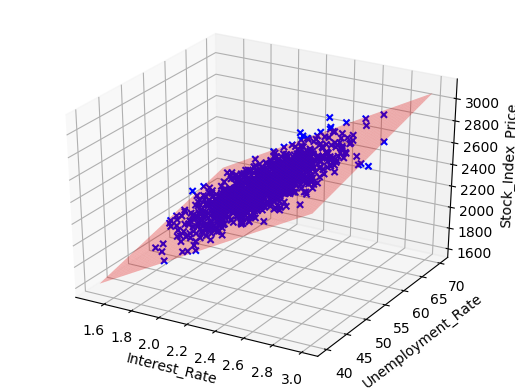

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
plt.show()

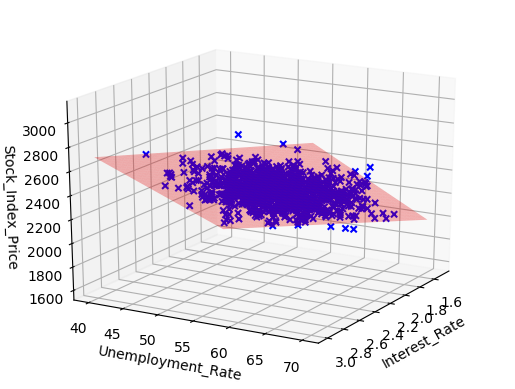

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(20, 30)
plt.show()

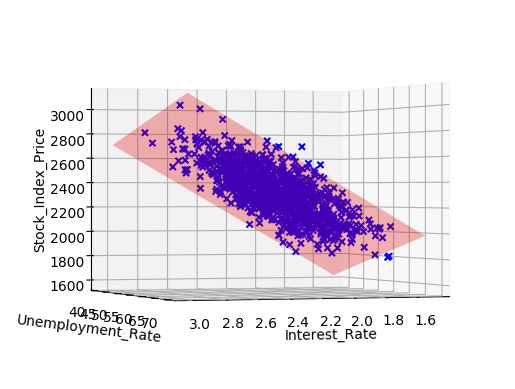

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(0, 70)
plt.show()

In [75]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Interest Rates,722.883338
Employment,12.082938


# EXCELLENT JOB!